In [1]:
using Revise
using DelimitedFiles

import PyPlot as plt

In [2]:
using SkyLLG

[ Info: Precompiling SkyLLG [00d88b7d-44fe-44d2-9db6-8ed2d3a0fc3c] (cache misses: include_dependency fsize change (2), include_dependency fhash change (2))


In [3]:
params = LlgParams(
    0.0,                  # Heisenberg exchange J
    [0.0, 0.0, 0.0],      # Easy axis anisotropy vector
    [0.0, 0.0, 1.0],      # External magnetic field vector B
    0.1,                  # Gilbert damping parameter αG
);

In [4]:
angles = [(π/2, 0)]  # tuples are (θ, ϕ)
initial_state = create_initial_state(angles, SpinState1D)
history = SpinHistory(initial_state);

times = 0.1:0.1:10
evolve!(history, times, params);

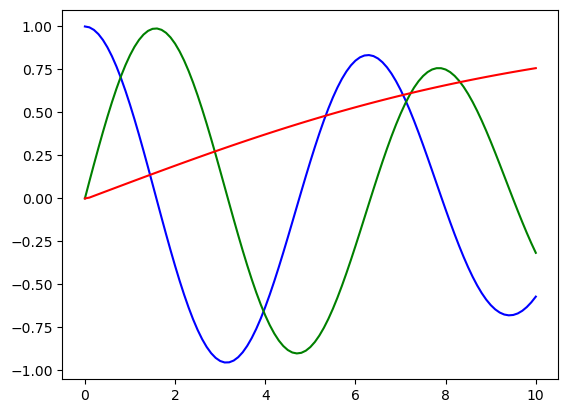

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1755fbf4c0>

In [5]:
results = reformat(history);

plt.plot(results[:,1], results[:,2], "b")
plt.plot(results[:,1], results[:,3], "g")
plt.plot(results[:,1], results[:,4], "r")

In [6]:
times = 0.1:0.1:20
params.αG = 0.5
evolve!(history, times, params);

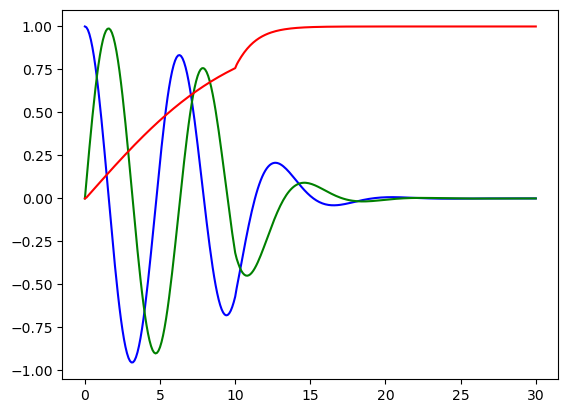

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f175f3efbe0>

In [7]:
results = reformat(history);

plt.plot(results[:,1], results[:,2], "b")
plt.plot(results[:,1], results[:,3], "g")
plt.plot(results[:,1], results[:,4], "r")

In [8]:
N = 100
dw_w = 2

dw_params = LlgParams(
    1.0,                   # Heisenberg exchange J
    [0, 0, 1/dw_w^2],      # Easy axis anisotropy vector
    [0.0, 0.0, -0.2],      # External magnetic field vector B
    0.1,                   # Gilbert damping parameter αG
);

angles = [(acos(tanh((n-N/2)/dw_w)), 0) for n in 1:N]
initial_dw = create_initial_state(angles, SpinState1D)
dw_history = SpinHistory(initial_dw)

times = 0.1:0.1:1000
evolve!(dw_history, times, dw_params);

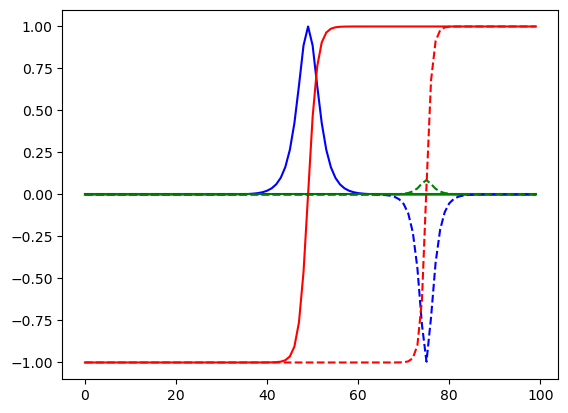

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1748250790>

In [9]:
results = reformat(dw_history)

plt.plot(results[1,2:3:end], "b")
plt.plot(results[1,3:3:end], "g")
plt.plot(results[1,4:3:end], "r")

plt.plot(results[end,2:3:end], "b--")
plt.plot(results[end,3:3:end], "g--")
plt.plot(results[end,4:3:end], "r--")

In [10]:
N = 10

params = LlgParams(
    1.0,                  # Heisenberg exchange J
    [0,0,0.5],            # Easy axis anisotropy vector
    [0.0, 0.0, 0.1],      # External magnetic field vector B
    0.01,                 # Gilbert damping parameter αG
)

angles = [(rand()*π/4, rand()*2π) for n in 1:N^2]
angles = reshape(angles, (10, 10))

initial_2d_rand = create_initial_state(angles, SpinState2D)
rand_history = SpinHistory(initial_2d_rand);

times = 0.01:0.01:100
evolve!(rand_history, times, params);

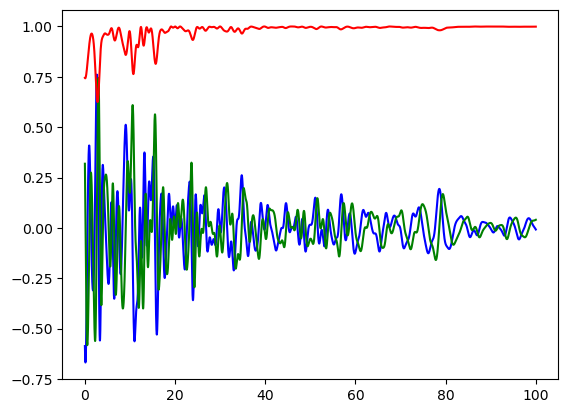

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f174993f160>

In [11]:
results = reformat(rand_history)

site = 90
plt.plot(results[:,1], results[:,site*3-1], "b")
plt.plot(results[:,1], results[:,site*3], "g")
plt.plot(results[:,1], results[:,site*3+1], "r")

In [40]:
kernel_file = "./kernel_nm1D_mu0.0_f0.05_w200.0_z5.0_x0.txt"
kernel, head = readdlm(kernel_file, header=true)

times=eval(Meta.parse(head[1]))
kernel = convert_to_triangular(kernel, Integer(times[end]/times[1])+1);

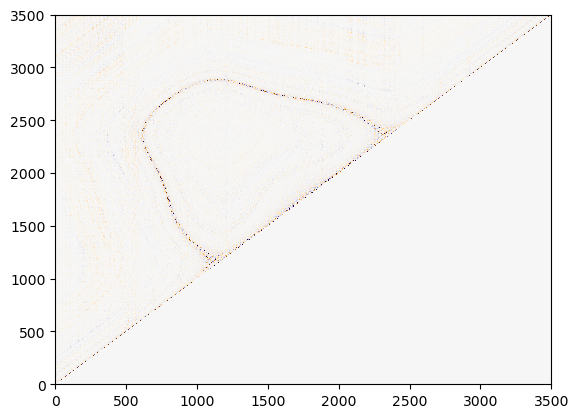

PyObject <matplotlib.collections.QuadMesh object at 0x7f1748b5efd0>

In [43]:
plt.pcolormesh(kernel, cmap="PuOr", vmin=-0.5, vmax=0.5)

In [47]:
angles = [(0.2, 0), (0.3, 0)]  # tuples are (θ, ϕ)
initial_state = create_initial_state(angles, SpinState1D)

params = LlgParams(
    0.0,                   # Heisenberg exchange J
    [0, 0, 0],             # Easy axis anisotropy vector
    [0.0, 0.0, 0.01],      # External magnetic field vector B
    0.01,                  # Gilbert damping parameter αG
    true,                  # Use Non-Markovian kernel?
    kernel,                # Non-Markovian kernel
    (1),                   # Sites subject to light
    0.1,                   # Jsd coupling
);

In [48]:
history = SpinHistory(initial_state)

for i=1:4
    evolve!(history, times, params);
end

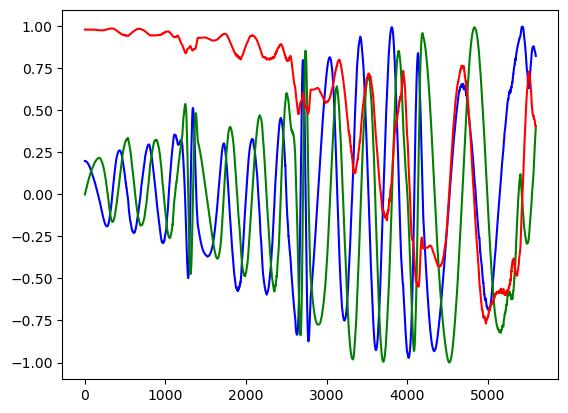

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f17472346d0>

In [51]:
results = reformat(history);

sit=1

plt.plot(results[:,1], results[:,2+(sit-1)*3], color="blue")
plt.plot(results[:,1], results[:,3+(sit-1)*3], color="green")
plt.plot(results[:,1], results[:,4+(sit-1)*3], color="red")